In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST

import matplotlib.pyplot as plt

import pytorch_lightning as pl

In [138]:
df = pd.read_csv('PS1B_train.csv')

#Solution - (using ctgan)

In [5]:
!pip install ctgan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
df.head()

,C1,C2,C3,C4,C5,C6,C7,C8,Outcome
0,5,187,76,27,207,43.6,1.034,53,1
1,3,129,64,29,115,26.4,0.219,28,1
2,0,131,0,0,0,43.2,0.270,26,1
3,10,115,0,0,0,0.0,0.261,30,1
4,0,107,60,25,0,26.4,0.133,23,0


In [142]:
categorical_features = ['C1','C2','C3','C4','C5','C6','C7','C8']

In [143]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
#model = CTGAN(verbose=True)
ctgan.fit(df, categorical_features, epochs = 200)

Epoch 1, Loss G:  4.3510,Loss D:  0.0022
Epoch 2, Loss G:  4.2304,Loss D: -0.0043
Epoch 3, Loss G:  4.2904,Loss D:  0.0014
Epoch 4, Loss G:  4.3334,Loss D: -0.0124
Epoch 5, Loss G:  4.2273,Loss D: -0.0268
Epoch 6, Loss G:  4.2991,Loss D: -0.0226
Epoch 7, Loss G:  4.2673,Loss D: -0.0209
Epoch 8, Loss G:  4.2222,Loss D: -0.0277
Epoch 9, Loss G:  4.1711,Loss D: -0.0608
Epoch 10, Loss G:  4.2155,Loss D: -0.0873
Epoch 11, Loss G:  4.2457,Loss D: -0.0754
Epoch 12, Loss G:  4.2163,Loss D: -0.0956
Epoch 13, Loss G:  4.1763,Loss D: -0.1244
Epoch 14, Loss G:  4.2077,Loss D: -0.1186
Epoch 15, Loss G:  4.2303,Loss D: -0.1194
Epoch 16, Loss G:  4.2388,Loss D: -0.1350
Epoch 17, Loss G:  4.3002,Loss D: -0.1418
Epoch 18, Loss G:  4.1866,Loss D: -0.1376
Epoch 19, Loss G:  4.2897,Loss D: -0.2020
Epoch 20, Loss G:  4.2506,Loss D: -0.1655
Epoch 21, Loss G:  4.2470,Loss D: -0.1736
Epoch 22, Loss G:  4.1274,Loss D: -0.1763
Epoch 23, Loss G:  4.1794,Loss D: -0.1839
Epoch 24, Loss G:  4.2326,Loss D: -0.2006
E

In [144]:
samples = ctgan.sample(3000)

In [145]:
samples.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,Outcome
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,3.932667,120.934667,70.816667,22.384333,104.929000,32.560667,0.529048,33.549000,0.216000
std,3.456412,32.839649,14.971922,15.941832,117.403074,7.468048,0.395459,11.989114,0.411583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,8.000000,0.000000,27.600000,0.259000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,84.000000,32.000000,0.426000,30.000000,0.000000
75%,6.000000,140.000000,80.000000,33.000000,159.000000,36.700000,0.687000,41.000000,0.000000
max,13.000000,197.000000,108.000000,99.000000,744.000000,59.400000,2.420000,68.000000,1.000000


In [146]:
df.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,Outcome
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,3.876221,119.781759,70.403909,21.680782,84.045603,32.167752,0.516850,33.221498,0.306189
std,3.352541,33.839122,16.196901,16.257398,115.864009,7.472956,0.376618,11.856293,0.461662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.200000,0.259000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,44.000000,32.000000,0.407000,30.000000,0.000000
75%,6.000000,139.000000,80.000000,33.000000,137.500000,36.300000,0.679500,40.500000,1.000000
max,13.000000,197.000000,108.000000,99.000000,744.000000,59.400000,2.420000,68.000000,1.000000


(307, 9) (3000, 9)


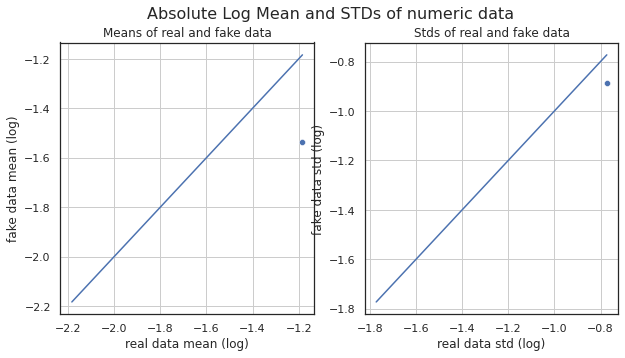

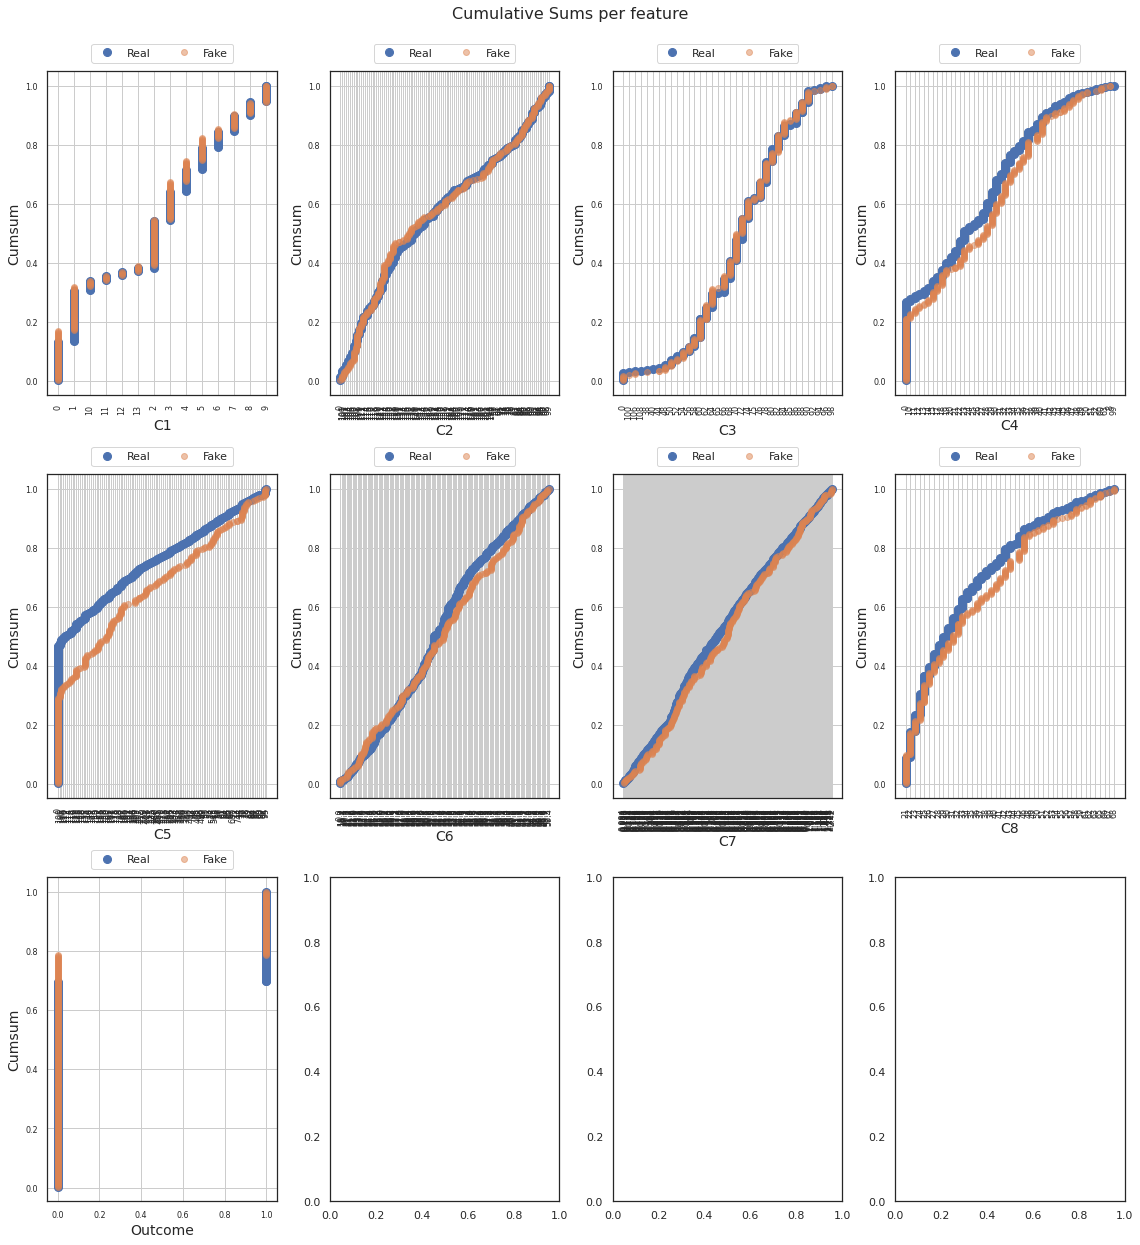

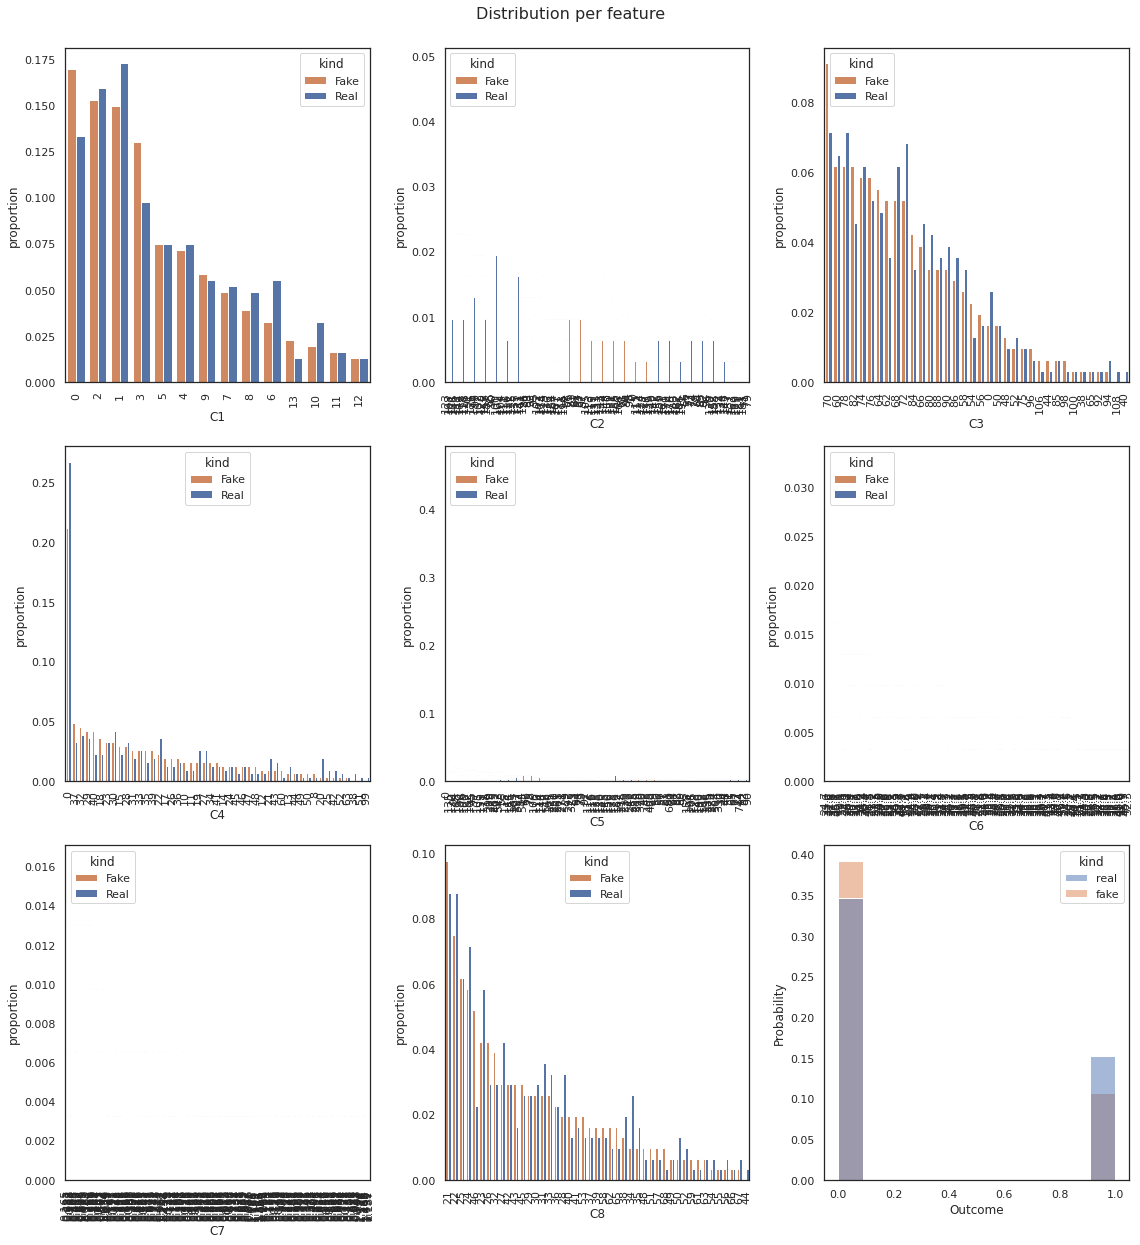

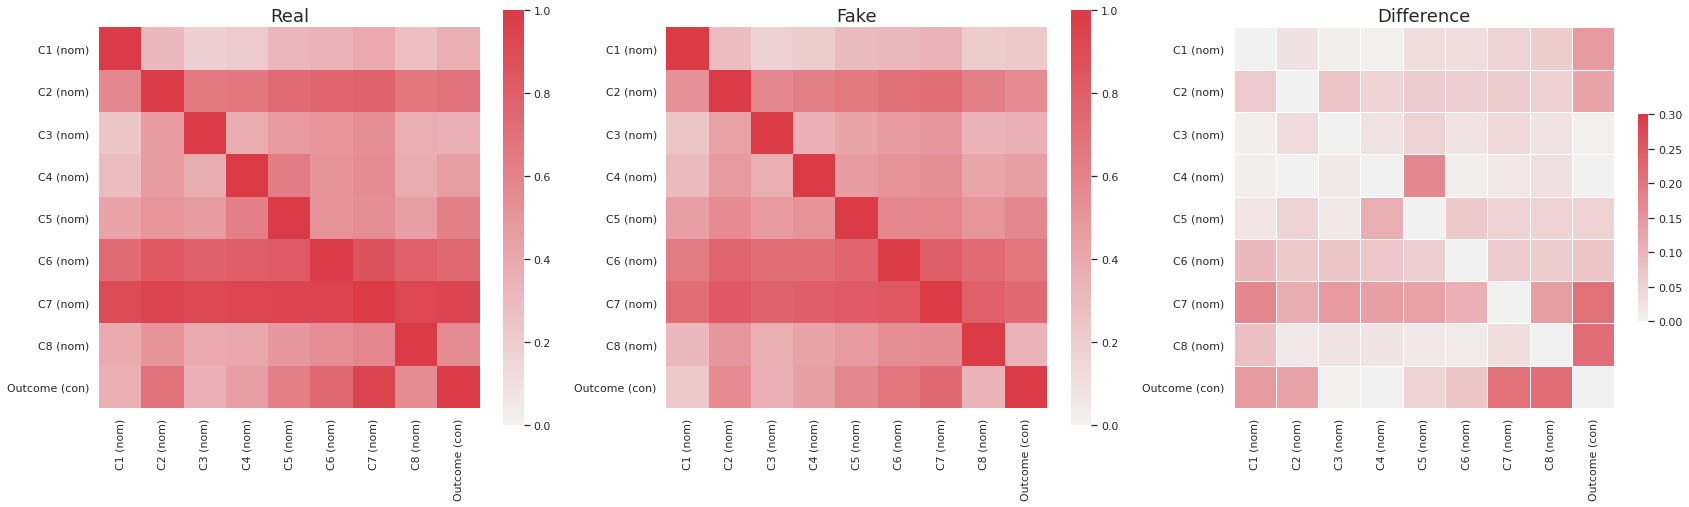

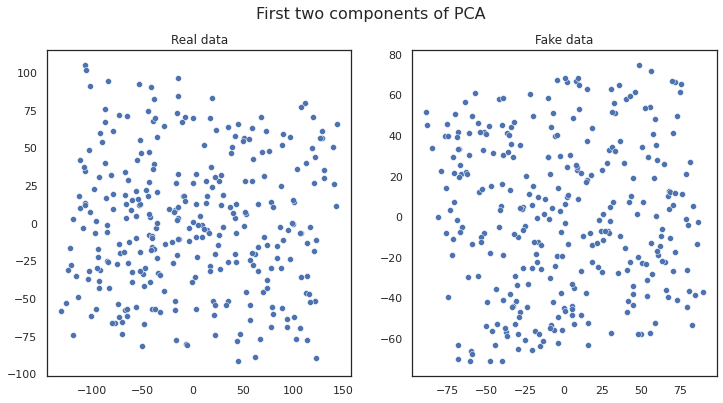

In [147]:
from table_evaluator import TableEvaluator

print(df.shape, samples.shape)
table_evaluator =  TableEvaluator(df, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

In [ ]:
ctgan

In [148]:
combined_dataset=df.append(samples)

In [150]:
x_train=combined_dataset.iloc[:,1:8]
y_train=combined_dataset['Outcome']
x_train_tensor=torch.Tensor(x_train.values)
y_train_tensor=torch.Tensor(y_train.values)

In [172]:
y_train_tensor.reshape([3307])

tensor([1., 1., 1.,  ..., 0., 0., 0.])

In [173]:
y_train_tensor.shape

torch.Size([3307])

In [151]:
x_train_tensor[0].shape

torch.Size([7])

In [93]:
class RegressionNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1=nn.Linear(8,128,bias=True)
    self.linear2=nn.Linear(128,64,bias=True)
    self.linear3=nn.Linear(64,32,bias=True)
    self.linear4=nn.Linear(32,16,bias=True)
    self.linear5=nn.Linear(16,8,bias=True)
    self.linear6=nn.Linear(8,4,bias=True)
    self.linear7=nn.Linear(4,2,bias=True)
    self.linear8=nn.Linear(2,1,bias=True)
    self.activation=nn.ReLU()

  def forward(self,x):
    x=self.activation(self.linear1(x))
    x=self.activation(self.linear2(x))
    x=self.activation(self.linear3(x))
    x=self.activation(self.linear4(x))
    x=self.activation(self.linear5(x))
    x=self.activation(self.linear6(x))
    x=self.activation(self.linear7(x))
    x=self.activation(self.linear8(x))
    return x


In [165]:
class ClassificationNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1=nn.Linear(7,128,bias=True)
    self.linear2=nn.Linear(128,64,bias=True)
    self.linear3=nn.Linear(64,32,bias=True)
    self.linear4=nn.Linear(32,16,bias=True)
    self.linear5=nn.Linear(16,8,bias=True)
    self.linear6=nn.Linear(8,4,bias=True)
    self.linear7=nn.Linear(4,2,bias=True)
    self.linear8=nn.Linear(2,1,bias=True)
    self.activation=nn.ReLU()

  def forward(self,x):
    x=self.activation(self.linear1(x))
    x=self.activation(self.linear2(x))
    x=self.activation(self.linear3(x))
    x=self.activation(self.linear4(x))
    x=self.activation(self.linear5(x))
    x=self.activation(self.linear6(x))
    x=self.activation(self.linear7(x))
    x=self.activation(self.linear8(x))
    return x

In [166]:
modelD=RegressionNetwork()
loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=modelD.parameters(),
                          lr=0.01,
                          momentum=0.9)

In [179]:
modelB=ClassificationNetwork()
loss_fn_class=nn.BCEWithLogitsLoss()
optimizer_class=torch.optim.SGD(params=modelB.parameters(),
                       lr=0.01,
                       momentum=0.9)

In [ ]:
epochs=500

epoch_count=[]
training_loss=[]
testing_loss=[]

for epoch in range(epochs):
  epoch_count.append(epoch)
  modelD.train()
  #for j in range(x_train_tensor.shape[0]):
  y_preds=modelD(x_train_tensor.type(torch.float32))
  loss=loss_fn(y_preds,y_train_tensor)
    #training_loss.append(loss)
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  '''model_recap.eval()
  with torch.inference_mode():
    y_preds=model_recap(X_test)
    test_loss=loss_fn(y_preds,Y_test)
    testing_loss.append(test_loss)'''
  
  if epoch%10==0:
    print(f"Epoch  {epoch+1} | Training loss {loss}")

In [ ]:
#training 



epochs=500
for epoch in range(epochs):
  modelB.train()
  y_logits=modelB(x_train_tensor)
  y_preds=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn_class(y_logits,y_train_tensor.reshape([3307,1]))
  optimizer_class.zero_grad()
  #acc=accuracy_fn(y_train,y_preds)
  loss.backward()
  optimizer_class.step()

  '''model_2.eval()
  with torch.inference_mode():
    test_logits=model_2(X_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_test,test_preds)'''
  
  if epoch%10==0:
    print(f"Epoch : {epoch} | Loss : {loss} ")

In [181]:
test_df=pd.read_csv('/content/PS1B_test.csv')

In [182]:
x_test=test_df.iloc[:,1:8]
x_test_tensor=torch.Tensor(x_test.values)


In [183]:
x_test_tensor

tensor([[8.0000e+00, 9.5000e+01, 7.2000e+01,  ..., 0.0000e+00, 3.6800e+01,
         4.8500e-01],
        [1.0000e+00, 9.3000e+01, 5.6000e+01,  ..., 0.0000e+00, 2.2500e+01,
         4.1700e-01],
        [6.0000e+00, 1.5400e+02, 7.8000e+01,  ..., 1.4000e+02, 4.6100e+01,
         5.7100e-01],
        ...,
        [1.0000e+00, 1.1200e+02, 8.0000e+01,  ..., 1.3200e+02, 3.4800e+01,
         2.1700e-01],
        [2.0000e+00, 1.5700e+02, 7.4000e+01,  ..., 4.4000e+02, 3.9400e+01,
         1.3400e-01],
        [1.0000e+01, 1.6800e+02, 7.4000e+01,  ..., 0.0000e+00, 3.8000e+01,
         5.3700e-01]])

In [184]:
modelB.eval()
with torch.inference_mode():
  y_preds=modelB(x_test_tensor.type(torch.float32))

In [ ]:
y_preds

In [188]:
pred_df_B=pd.DataFrame(y_preds.numpy())

In [189]:
pred_df_B.to_csv('preds_B.csv')